In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from random import randint
from matplotlib import pyplot as plt
import numpy as np

/home/juliotorres/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [40]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01, decay=1e-6), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
__________

In [15]:
labels = [ 'avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión' ]

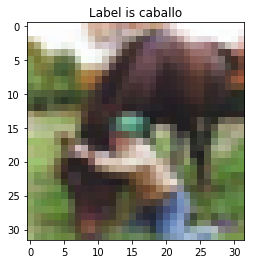

In [30]:
n = randint(0, x_train.shape[0]-1)
plt.title('Label is {label}'.format(label=labels[y_train[n][0]]))
plt.imshow(x_train[n])
plt.show()

In [41]:
model.fit(x_train[10000:20000], to_categorical(y_train[10000:20000]), batch_size=32)

Epoch 1/1
   96/10000 [..............................] - ETA: 2:23:23 - loss: 6.2972 - acc: 0.1458

KeyboardInterrupt: 

In [13]:
y_pred = model.predict(x_test[:100])
y_test_class = np.argmax(y_test[:100],axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Prediccion: automóvil


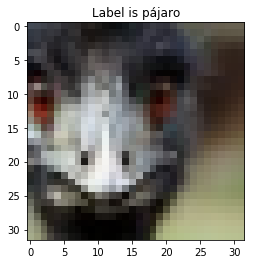

In [37]:
n = randint(1, y_test_class.shape[0]) - 1
y_pred = model.predict(x_test[n:n+1])
#print(y_pred)
#print(np.argmax(y_pred))
#print(n)
print("Prediccion: {}".format(labels[np.argmax(y_pred,axis=1)[0]]))
plt.title('Label is {label}'.format(label=labels[y_test[n][0]]))
plt.imshow(x_test[n], cmap='gray')
plt.show()